# Regression tasks with sklearn

In this notebook we will explore various algorithms for doing regression tasks with scikit-learn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


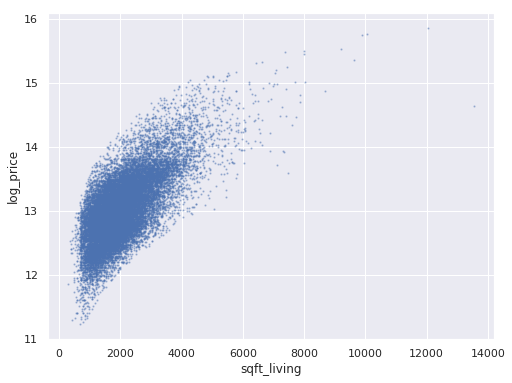

In [6]:
# load data
url = "https://storage.googleapis.com/qeds/data/kc_house_data.csv"
df = pd.read_csv(url)

X = df.drop(["price", "date", "id"], axis=1).copy()
# convert everything to be a float for later on
X = X.astype(float)

# notice the log here!
y = np.log(df["price"])
df["log_price"] = y

def var_scatter(df, ax=None, var="sqft_living"):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="log_price", alpha=0.35, s=1.5, ax=ax)

    return ax

var_scatter(df);

## Linear Regression

Let’s dive in by studying the [“Hello World”](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) of regression
algorithms: linear regression

Suppose we would like to predict the log of the sale price of a home, given
only the livable square footage of the home

The linear regression model for this situation is

$$
\log(\text{price}) = \beta_0 + \beta_1 \text{sqft_living} + \epsilon
$$

$ \beta_0 $ and $ \beta_1 $ are called parameters (also coefficients or
weights) and it is the task of the machine learning algorithm to find the values
for the parameters that best fit the data

$ \epsilon $ is the error term. It would be unusual for the observed
$ \log(\text{price}) $ will be an exact linear function of
$ \text{sqft_living} $. The error term captures the deviation of
$ \log(\text{price}) $ from a linear function of $ \text{sqft_living} $.

The linear regression algorithm will choose the parameters to minimize the
*mean squared error* (MSE) function, which for our example is written

$$
\frac{1}{N} \sum_{i=1}^N \left(\log(\text{price}_i) - (\beta_0 + \beta_1 \text{sqft_living}_i) \right)^2
$$

The output of this algorithm is the straight line (hence linear) that passes as
close to the points on our scatter chart as possible

The `sns.lmplot` function below will plot our scatter chart and draw the
optimal linear regression line through the data

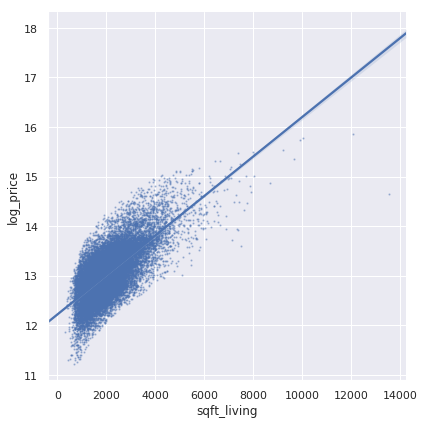

In [7]:
sns.lmplot(
    data=df, x="sqft_living", y="log_price", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

Let’s use `sklearn` to replicate the figure ourselves

First we fit the model

In [8]:
# import
from sklearn import linear_model

# construct the model instance
sqft_lr_model = linear_model.LinearRegression()

# fit the model
sqft_lr_model.fit(X[["sqft_living"]], y)

# print the coefficients
beta_0 = sqft_lr_model.intercept_
beta_1 = sqft_lr_model.coef_

print(f"Fit model: log(price) = {beta_0} + {beta_1} sqft_living")

Fit model: log(price) = 12.218464096380853 + [0.00039875] sqft_living


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


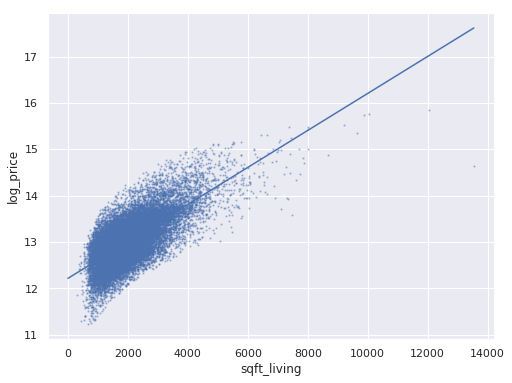

In [9]:
ax = var_scatter(df)

# points for the line
x = np.array([0, df["sqft_living"].max()])
ax.plot(x, beta_0 + beta_1*x)

We can call the `predict` method on our model to evaluate the model at
arbitrary points

For example, we can ask the model to predict the sale price of a 5,000 square
foot home

In [10]:
# note, the argument needs to be two-dimensional, you'll see why shortly
logp_5000 = sqft_lr_model.predict([[5000]])[0]
print(f"The model predicts a 5,000 sq. foot home would cost {np.exp(logp_5000)} dollars")

The model predicts a 5,000 sq. foot home would cost 1486889.318775181 dollars


<blockquote>

**Check for understanding**

Use the `sqft_lr_model` that we fit to generate predictions for all data points
in our sample

Note that you need to pass the `predict` a DataFrame (not Series)
containing the `sqft_living` column – (see how we passed that to `.fit`
above for help)

Make a scatter chart with the actual data and the predictions on the same
figure. Does it look familiar?

When making the scatter for model predictions we recommend passing
`c="red"` and `alpha=0.25` so you can distinguish the data from
predictions


</blockquote>

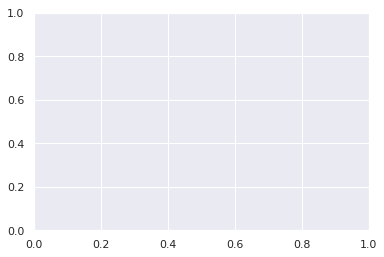

In [11]:
# generate predictions

# plot
fig, ax = plt.subplots()

# make scatter of data

# make scatter of predictions

<blockquote>

</blockquote>

<blockquote>

**Check for understanding**

Use the `metrics.mean_squared_error` function to evaluate the loss
function used by `sklearn` when it fit the model for us

Read the docstring to learn what the arguments to that function should be


</blockquote>

In [12]:
from sklearn import metrics

# your code here

### Multivariate linear regression

The example we have been working with is referred to as univariate linear
regression because we used a single feature

In practice more features would be used

Suppose that in addition to `sqft_living` we also wanted to use the `bathrooms` variable

In this case the linear regression model is

$$
\log(\text{price}) = \beta_0 + \beta_1 \text{sqft_living} +
\beta_2 \text{bathrooms} + \epsilon
$$

We could keep adding one variable at a time and adding a new $ \beta_{j} $ coefficient for the $ j $ th variable, but there’s an easier way

Let’s write this equation in vector/matrix form as

$$
\underbrace{\begin{bmatrix} \log(\text{price}_1) \\ \log(\text{price}_2) \\ \vdots \\ \log(\text{price}_N)\end{bmatrix}}_Y = \underbrace{\begin{bmatrix} 1 & \text{sqft_living}_1 & \text{bathrooms}_1 \\ 1 & \text{sqft_living}_2 & \text{bathrooms}_2 \\ \vdots & \vdots & \vdots \\ 1 & \text{sqft_living}_N & \text{bathrooms}_N \end{bmatrix}}_{X} \underbrace{\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{bmatrix}}_{\beta} + \epsilon
$$

Notice that we can add as many columns to $ X $ as we’d like and the linear
regression model will still be written $ Y = X \beta + \epsilon $

The mean squared error loss function for the general model is

$$
\frac{1}{N} \sum_{i=1}^N (y_i - X_i \beta)^2 = \frac{1}{N} {|| y - X \beta||_2}^2
$$

where $ || \cdot ||_2 $ is the [l2-norm](http://mathworld.wolfram.com/L2-Norm.html)

Let’s fit the linear regression model using all the columns in `X`

In [11]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We just fit a model with 18 variables and it was just as fast and easy as
fitting the model with 1 variable!

It is difficult to visualize a 18-dimensional model, but just so we can see the
difference the extra features made let’s make the log price vs `sqft_living`
one more time, including the prediction from both of our linear models

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


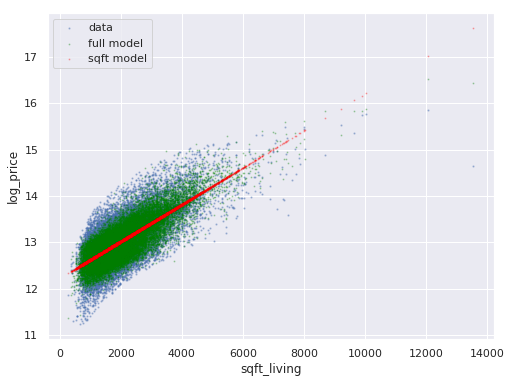

In [12]:
ax = var_scatter(df)

def scatter_model(mod, X, ax=None, color="green", x="sqft_living"):
    if ax is None:
        _, ax = plt.subplots()

    ax.scatter(X[x], mod.predict(X), c=color, alpha=0.25, s=1)
    return ax

scatter_model(lr_model, X, ax, color="green")
scatter_model(sqft_lr_model, X[["sqft_living"]], ax, color="red")
ax.legend(["data", "full model", "sqft model"])

<blockquote>

**Check for understanding**

Compare the mean squared error for the `lr_model` and the `sqft_lr_model`

Which model has a better fit? Defend your answer to your neighbor


</blockquote>

### Nonlinear relationships in linear regression

While it sounds like an oxymoron, it is possible to include non-linear features
in a linear regression model

The distinguishing feature of the linear regression model is that the each
prediction is generated by taking the dot product (a linear operator) between a
feature vector (one row of $ X $) and a coefficient vector ($ \beta $)

There is, however, no restriction on what element we include in our feature
vector

Let’s consider an example…

Starting from the `sqft_living` only model, suppose we have a hunch that we
should also include the *percent of square feed above ground*

This last variable can be computed as `sqft_above / sqft_living`

This second feature is nonlinear, but could easily be included as a column in
`X`

Let’s see this in action

In [13]:
X2 = X[["sqft_living"]].copy()
X2["pct_sqft_above"] = X["sqft_above"] / X["sqft_living"]

sqft_above_lr_model = linear_model.LinearRegression()
sqft_above_lr_model.fit(X2, y)

new_mse = metrics.mean_squared_error(y, sqft_above_lr_model.predict(X2))
old_mse = metrics.mean_squared_error(y, sqft_lr_model.predict(X2[["sqft_living"]]))
print(f"The mse changed from {old_mse} to {new_mse} by including our new feature")

The mse changed from 0.14326910852241476 to 0.14303867743053914 by including our new feature


<blockquote>

**Check for understanding**

Explore how the fit of the full model can be improved by adding additional
features created from the existing ones


</blockquote>

In [14]:
# your code here

<blockquote>

</blockquote>

The process of determining what columns belong in $ X $ is called *feature
engineering* and is a large part of a machine learning practitioner’s job

You may recall from (or will see in) your econometrics course(s) that
the choice of which control variables to include in a regression model
is an important part of applied research

### Interpretability

Before moving to our next regression model, we want to touch on the idea of
the **interpretability** of models

A model that is interpretable is a model for which we can analyze the
coefficients and explain why it makes its predictions

Recall $ \beta_0 $ and $ \beta_1 $ from the univariate model

The interpretation of the model is that $ \beta_0 $ captures the notion of
the average or starting house price and $ \beta_1 $ is the additional value
per square foot

Concretely we have

In [15]:
beta_0, beta_1

(12.218464096380853, array([0.00039875]))

which means that our model predicts the log price of a house to be 12.22, plus
an additional 0.0004 for every square foot

Some more exotic machine learning methods are potentially more accurate, but
less interpretable

The accuracy vs interpretably tradeoff is a hot discussion topic, especially as
it relates to things like ethics in machine learning and is something you
should be aware of as continue to learn about these techniques

## Lasso Regression

Lasso regression is very closely related to linear regression

The lasso model also generates predictions using $ y = X \beta $, but it
optimizes over a slightly different loss function

The optimization problem solved by lasso regression can be written

$$
\min_{\beta} {|| X \beta - y||_2}^2 + \underbrace{\alpha {|| \beta ||_1}}_{\text{new part}}
$$

where $ || a ||_1 = \sum_{i=1}^N | a_i| $ is the [l1-norm](http://mathworld.wolfram.com/L1-Norm.html) and $ \alpha $ is called the regularization parameter

The additional term penalizes large coefficients and in practice has the effect
of setting coefficients to zero for features that are not informative about the
target

Let’s see an example of what this looks like using the full feature set in
`X`

In [16]:
lasso_model = linear_model.Lasso()
lasso_model.fit(X, y)

lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lr_coefs = pd.Series(dict(zip(list(X), lr_model.coef_)))
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))
coefs

,lasso,linreg
bedrooms,-0.000000e+00,-1.220820e-02
bathrooms,0.000000e+00,6.912370e-02
sqft_living,3.007615e-04,9.573470e-05
sqft_lot,2.736772e-07,4.711823e-07
floors,0.000000e+00,7.515336e-02
waterfront,0.000000e+00,3.711951e-01
view,0.000000e+00,6.040466e-02
condition,0.000000e+00,6.263658e-02
grade,0.000000e+00,1.589338e-01
sqft_above,-0.000000e+00,4.022408e-05


Notice that many of the coefficients from the lasso regression have been set to
zero

The intuition here is that the corresponding features must not have provided
enough predictive power to be worth considering alongside the other features

The default value for the $ \alpha $ parameter is 1.0

Larger values of the parameter will cause coefficients to shrink (and maybe
additional ones to be thrown out)

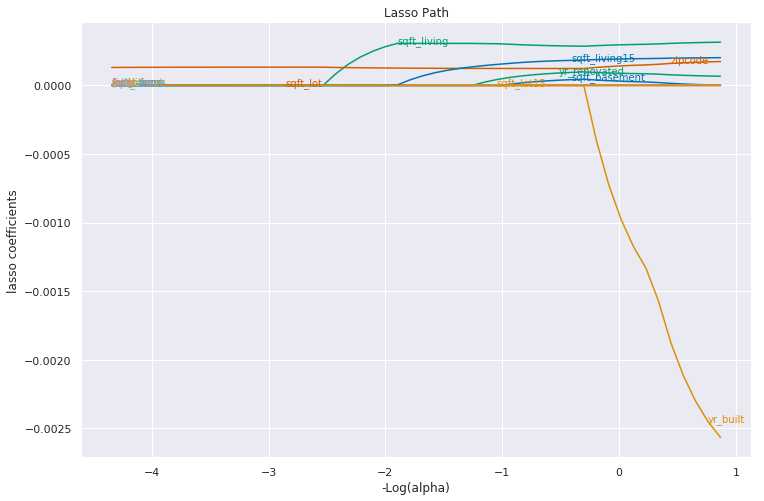

In [17]:
# Compute lasso for many alphas (the lasso path)
from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, fit_intercept=True, max_iter=10000)

# plotting
fig = plt.figure(figsize=(12, 8))
colors = cycle(sns.color_palette("colorblind", 16))
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, colors, list(X)):
       plt.plot(log_alphas, coef_l, c=c)
       plt.xlabel('-Log(alpha)')
       plt.ylabel('lasso coefficients')
       plt.title('Lasso Path')
       plt.axis('tight')
       maxabs = np.max(np.abs(coef_l))
       i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
       xnote = log_alphas[i]
       ynote = coef_l[i]
       plt.annotate(name, (xnote, ynote), color=c)

### Overfitting and regularization

You might be asking yourself “Why would we ever want to throw variables out,
can’t that only hurt our model?”

The primary answer is to help us avoid a common issue called **overfitting**

Overfitting refers to a model that specializes its coefficients too much on the
data it was trained on, and then performs poorly when predicting on data
outside the training set

The extreme example of overfitting is a model that can perfectly memorize the
training data, but can do no better than just randomly guess when predicting
on a new observation

The techniques applied to reduce overfitting are known as **regularization**

Regularization is an attempt to limit a model’s ability to specialize too narrowly
on training data (e.g. limit overfitting) by penalizing extreme values of the
model’s parameters

The additional term in the lasso regression loss function ($ \alpha ||\beta||_1 $)
is a form of regularization

Let’s demonstrate the overfitting and regularization phenomenon on our housing
price data as follows:

1. Split the data set into training and testing subsets. We will use the first 50 observations for training, and the rest for testing  
1. Fit the linear regression model and report MSE on training and testing datasets  
1. Fit the lasso model and report the same statistics  

In [18]:
def fit_and_report_mses(mod, X_train, X_test, y_train, y_test):
    mod.fit(X_train, y_train)
    return dict(
        mse_train=metrics.mean_squared_error(y_train, mod.predict(X_train)),
        mse_test=metrics.mean_squared_error(y_test, mod.predict(X_test))
    )

n_test = 50
X_train = X.iloc[:n_test, :]
X_test = X.iloc[n_test:, :]
y_train = y.iloc[:n_test]
y_test = y.iloc[n_test:]

fit_and_report_mses(linear_model.LinearRegression(), X_train, X_test, y_train, y_test)

{'mse_train': 0.05545627171577221, 'mse_test': 0.6705205330639927}

In [19]:
fit_and_report_mses(linear_model.Lasso(), X_train, X_test, y_train, y_test)

{'mse_train': 0.10629195024125099, 'mse_test': 0.2910434823708493}

Notice how the MSE on the training dataset was smaller for the linear model
without the regularization, but that the MSE on the test dataset was much
higher

This is a strong indication that the linear regression model was
overfitting

The regularization parameter has a large impact on overfitting

Text(-2.368878992199555, 0.2249868810554537, 'train')

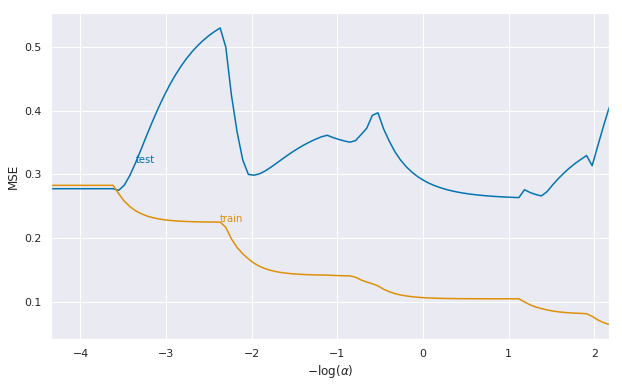

In [20]:
alphas = np.exp(np.linspace(10, -5, 100))
mse = pd.DataFrame([fit_and_report_mses(linear_model.Lasso(alpha=alpha, max_iter=50000),
                           X_train, X_test, y_train, y_test)
                    for alpha in alphas])
mse["log_alpha"] = -np.log10(alphas)
fig, ax = plt.subplots(figsize=(10,6))
colors = sns.color_palette("colorblind", 16)
mse.plot(x="log_alpha", y="mse_test", c=colors[0], ax=ax)
mse.plot(x="log_alpha", y="mse_train", c=colors[1], ax=ax)
ax.set_xlabel(r"$-\log(\alpha)$")
ax.set_ylabel("MSE")
ax.get_legend().remove()
ax.annotate("test",(mse.log_alpha[15], mse.mse_test[15]),color=colors[0])
ax.annotate("train",(mse.log_alpha[30], mse.mse_train[30]),color=colors[1])

### Cross-validation of regularization parameter

As you can see in the above figure, the regularization parameter has a
large impact on MSE in the test data. Moreoever, the relationship
between the test data MSE and $ \alpha $ is complicated and
non-monotonic. A popular method for choosing the regularization
parameter is cross-validation. Roughly speaking, cross-validation
splits the dataset into many training/testing subsets, and then choose
the value of regularization parameter that minimizes the average
MSE. More precisely k-fold cross-validation does the following:

1. Partition the dataset randomly into k subsets/”folds”  
1. Compute $ MSE_j(\alpha)= $ mean squared error in j-th subset
  when using the j-th subset as test data, and other k-1 as training
  data  
1. Minimize average (across folds) MSE $ \min_\alpha \frac{1}{k}
  \sum_{j=1}^k MSE_j(\alpha) $  


The following code plots 5-fold cross-validated MSE as a function of
$ \alpha $ using the same training data as above

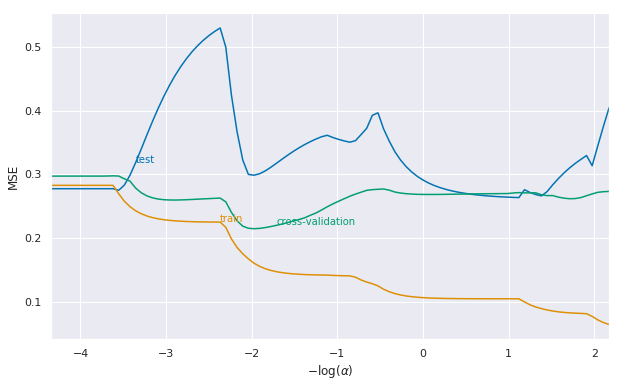

In [21]:
from sklearn.model_selection import cross_val_score
mse["cv"] = [-np.mean(cross_val_score(linear_model.Lasso(alpha=alpha, max_iter=50000),
                                  X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
          for alpha in alphas]
mse.plot(x="log_alpha", y="cv", c=colors[2], ax=ax)
ax.annotate("cross-validation", (mse.log_alpha[40], mse.cv[40]), color=colors[2])
ax.get_legend().remove()
ax.set_xlabel(r"$-\log(\alpha)$")
ax.set_ylabel("MSE")
fig

scikit learn also includes methods to automate the above and select
$ \alpha $

In [22]:
# LassoCV exploits special structure of lasso problem to minimize CV more efficiently
lasso = linear_model.LassoCV(cv=5).fit(X_train,y_train)
-np.log10(lasso.alpha_) # should roughly = minimizer on graph, not exactly equal due to random splitting

-1.9732104006516824

### Holdout

Another common technique that practitioners use to avoid overfitting is called
*holdout*

We demonstrated an extreme example of applying holdout above when we used only
the first 50 observations to train our models

In general, good practice is to split the entire dataset into a training subset
and testing or validation subset

The splitting should be done randomly and should leave enough data in the
training dataset to produce a good model, but also enough in the validation
subset to determine the degree of overfitting

There aren’t hard and fast rules for how much data to put in each subset, but a
reasonable default would be to use about %75 of the data for training and the
rest for testing

As in the example above, the training data is often further split
while selecting regularization parameters with cross-validation

The `sklearn` function `model_selection.train_test_split` will do this for you:

In [23]:
# note test_size=0.25 is the default value, but is shown here so you
# can see how to change it
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

<blockquote>

**Check for understanding**

Experiment with how the size of the holdout dataset can impact a diagnosis
of overfitting

Evaluate only the `LinearRegression` model on the full feature set and use
the `model_selection.train_test_split` function with various values for
`test_size`


</blockquote>

## Random Forests

Random forests are also becoming increasingly popular in
economics. This is largely due to the work by Susan Athey and her
coauthors. [[AI17]](#athey2017) gives a very brief overview of some of
this work, and [[AI18]](#athey2018) are video lectures and associated
code aimed at a broad audience.

### Regression Trees

To understand a forest, we must first understand trees.

We will begin to understand trees by looking at one.

We will a fit a tree to this simulated data.

In [27]:
import numpy as np
# Simulate some data and plot it
n = 1000
Xsim = np.random.rand(n,2)
def Ey_x(x):
      return 1/3*(np.sin(5*x[0])*np.sqrt(x[1])*np.exp(-(x[1]-0.5)**2))

ysim = np.apply_along_axis(Ey_x, 1, Xsim) + np.random.randn(n)*0.1

In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

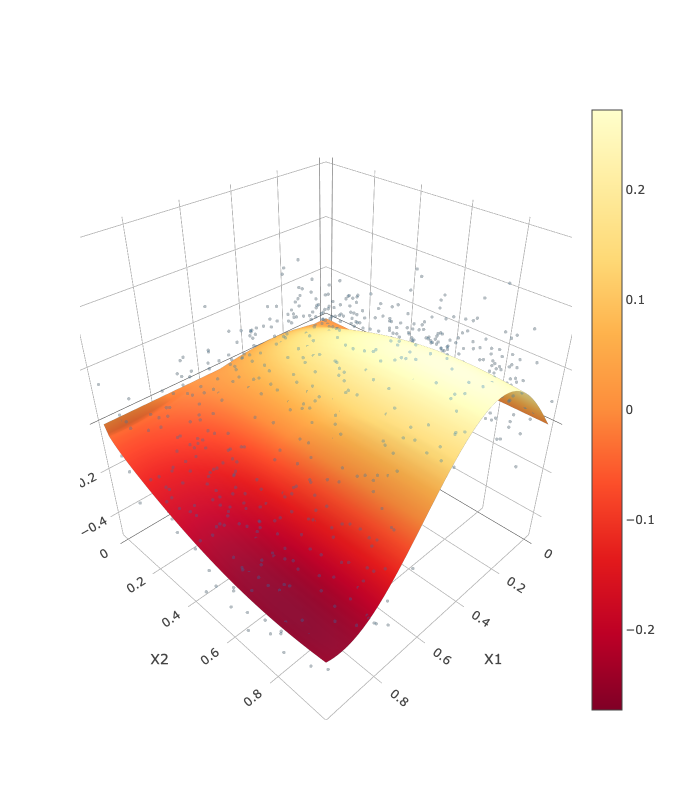

In [29]:
def surface_scatter_plot(X,y,f, xlo=0., xhi=1., ngrid=50,
                         width=1000, height=800, f0=Ey_x, show_f0=False):
    scatter = go.Scatter3d(x=X[:,0],y=X[:,1],z=y,
                           mode='markers',
                           marker=dict(size=2, opacity=0.3)
    )
    xgrid = np.linspace(xlo,xhi,ngrid)
    ey = np.zeros((len(xgrid),len(xgrid)))
    ey0 = np.zeros((len(xgrid),len(xgrid)))
    for i in range(len(xgrid)):
        for j in range(len(xgrid)):
            ey[j,i] = f([xgrid[i],xgrid[j]])
            ey0[j,i]= f0([xgrid[i],xgrid[j]])

    surface = go.Surface(x=xgrid, y=xgrid, z=ey, colorscale="YlOrRd", opacity=1.0)
    if (show_f0):
        surface0 = go.Surface(x=xgrid, y=xgrid, z=ey0, opacity=0.8, colorscale="YlOrRd")
        layers = [scatter, surface, surface0]
    else:
        layers = [scatter, surface]
    fig = go.Figure(data=layers,
                    layout = go.Layout(
                        autosize=True,
                        scene = dict(xaxis = dict(title='X1'),
                                     yaxis = dict(title='X2'),
                                     zaxis = dict(title='Y')),
                        width=width,
                        height=height))
    return(fig)

fig = surface_scatter_plot(Xsim,ysim,Ey_x)
py.iplot(fig)

We now fit a regression tree to this data, and plot the predicted
regression surface.

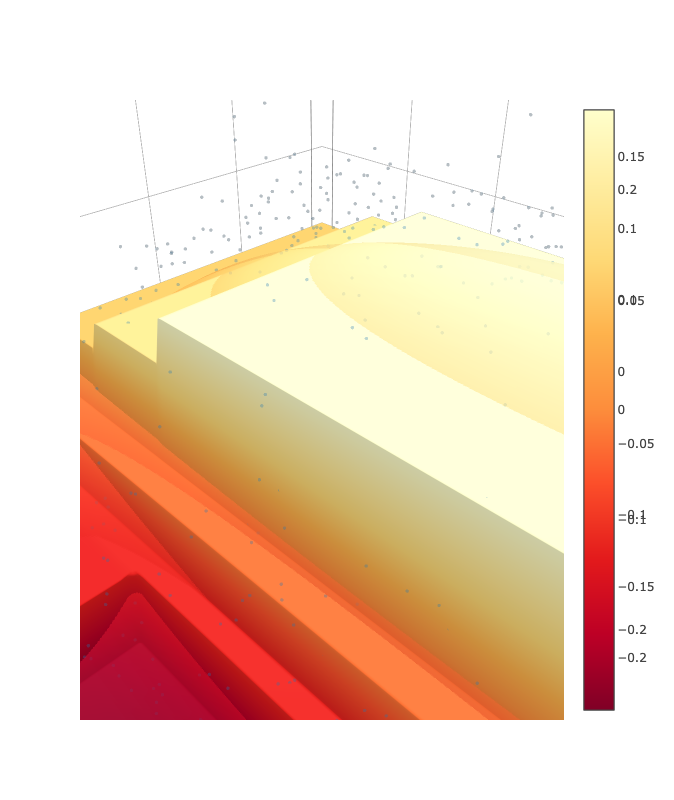

In [30]:
from sklearn import tree
fitted_tree = tree.DecisionTreeRegressor(max_depth=3).fit(Xsim,ysim)
fig=surface_scatter_plot(Xsim,ysim,lambda x:
                         fitted_tree.predict([x]), show_f0=True)
py.iplot(fig)

As you can see, predictions from regression trees are piecewise
constant on rectangular regions. The boundaries of these regions are
determined by a decision tree. The following code displays the
decision graph.

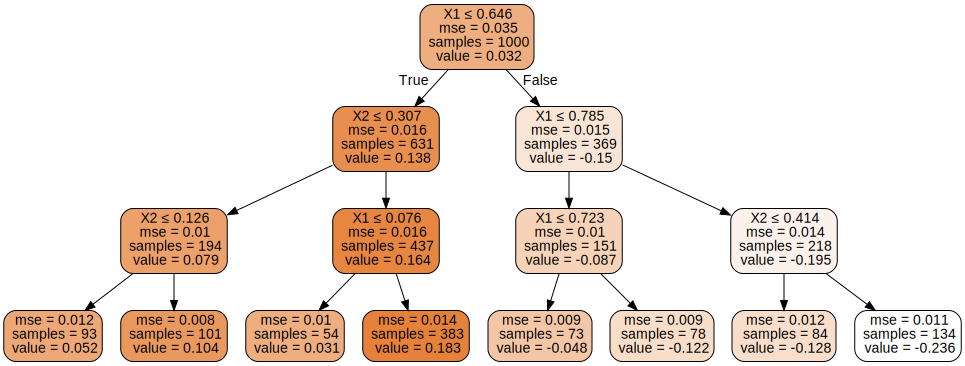

In [32]:
try:
    import graphviz
    tree_graph = tree.export_graphviz(fitted_tree, out_file=None,
                                      feature_names=["X1", "X2"],
                                      filled=True, rounded=True,
                                      special_characters=True)
    display(graphviz.Source(tree_graph))
except:
    print("graphviz not installed, cannot display tree")

Regression trees are formed iteratively.

We begin with a rectangular region $ R $ containing all values of
the X. We then choose a feature to split on and where to split. The
splitting feature and location are chosen to minimize MSE. We then
repeat to generate all the branches.

- For each region, solve  


$$
\min_{j,s} \left[ \min_{c_1} \sum_{i: x_{i,j} \leq s, x_i \in R}
    (y_i - c_1)^2 + \min_{c_2} \sum_{i: x_{i,j} > s, x_i \in R}
    (y_i - c_2)^2 \right]
$$

- Repeat with each of the two smaller rectangles  
- Stop when $ |R| = $ some chosen minimum size or when depth of tree $ = $
  some chosen maximum  
- Prune tree  


$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

There are many variations on this tree building algorithm. They all
share some rule to decide on which variable and where to split. They
all have some kind of stopping rule, but not necessarily the same
one. For example, some algorithms stop splitting into new branches
when the improvement in MSE becomes small.

As with lasso, regression trees involve some regularization. In the
above description, the minimum leaf size, maximum tree depth, and
$ \alpha $ in the pruning step serve as regularization
parameters.

<blockquote>

**Check for understanding**

Read the documentation for sklearn.tree.DecisionTreeRegressor, and
then experiment to see how adjusting some of the regularization parameters
affect the fitted tree.


</blockquote>

In [33]:
# plot trees when varying some regularization parameter(s)

<blockquote>

**Check for understanding**

Fit a regression tree to the housing price data and use graphviz
to visualize the decision graph.


</blockquote>

An advantage of regression trees (and random forests) is that they
adapt automatically to feature scales and units. Last class, a student
pointed out that it was strange to include the numeric zipcode as a
variable in the linear regression and lasso. It would have made more
sense to include indicator or dummy variables for each
zipcode. Regression trees do not impose linearity or even
monotonicity, so it less harmful to have the numeric zipcode as a
feature.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


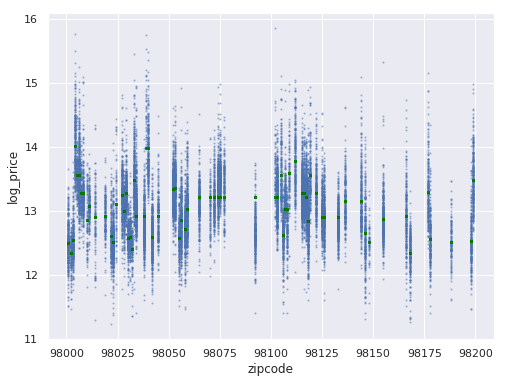

In [34]:
ax = var_scatter(df, var="zipcode")
zip_tree = tree.DecisionTreeRegressor(max_depth=10).fit(X[["zipcode"]],y)
scatter_model(zip_tree, X[["zipcode"]], ax, x="zipcode")

### Random Forests

A random forests is the average of many randomized regression trees

Trees randomized by
- Fitting on randomly resampled subsets of data
- Randomize features chosen for branching:

$$
\min_{j \in S,s} \left[ \min_{c_1} \sum_{i: x_{i,j} \leq s, x_i \in R}
    (y_i - c_1)^2 + \min_{c_2} \sum_{i: x_{i,j} > s, x_i \in R}
    (y_i - c_2)^2 \right]
$$

where $ S $ is a random subset of features

Randomizing and averaging smooths out the predictions from individual
trees. This improves predictions and reduces the variance of the
predictions.

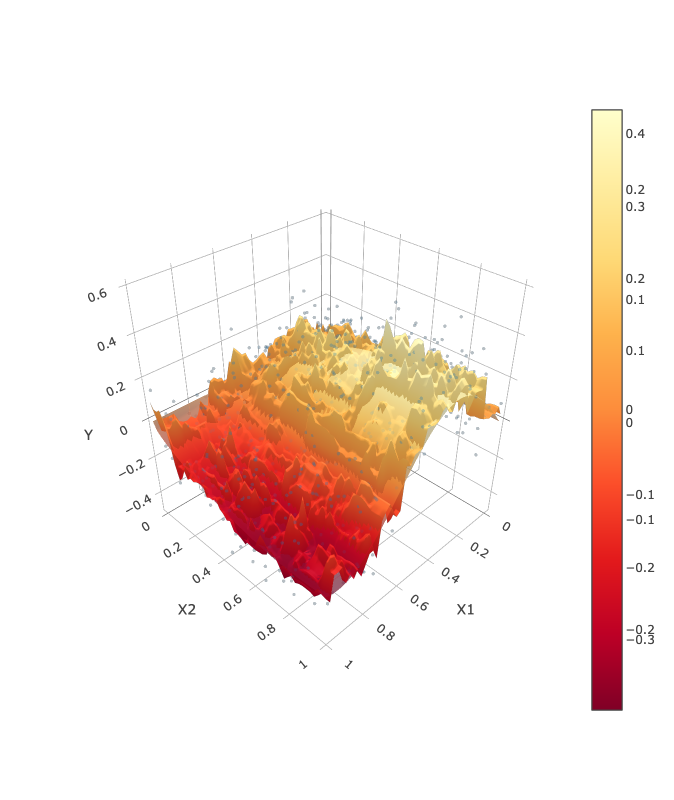

In [35]:
# example of forest for simulated data

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 10).fit(Xsim,ysim)
fig=surface_scatter_plot(Xsim,ysim,lambda x: forest.predict([x]),
                         show_f0=True)
py.iplot(fig)

Random forests generally produce more accurate predictions than any
single tree. However, random forests have at least two downsides
compared to trees. Random forests take longer to compute, and random
forests can be more difficult to interpret. We can no longer draw a
single decision graph. Instead, people often report “feature
importance” for random forests. Feature importance is the average
across trees of how much the splits on each feature decreased
MSE. Greater importance of a given feature means that the trees split
on that feature more often and/or splitting on that feature resulted
in larger decreases in MSE.

In [36]:
forest.feature_importances_

array([0.79751386, 0.20248614])

<blockquote>

**Check for understanding**

Fit a random forest to the housing price data. Compare the MSE on
a testing set to that of Lasso.


</blockquote>

In [37]:
# Fit random forest and compute MSE

<blockquote>
Produce a bar chart of feature importances for predicting house
prices.


</blockquote>

<blockquote>

</blockquote>

## Neural Networks

The final regression algorithm we will talk about in this lecture is a type of
neural network.

Based on your interest in this course, our strong prior is that you have
probably heard about neural networks in the news or social media.

The purpose of this section is not to give an exhaustive overview of the topic,
but instead to introduce you to a particular neural network model and present
it from a different perspective that hopefully complement materials you may run
into elsewhere.

### Mathematical Background

If linear regression is the [“Hello World”](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) of regression
algorithms, then the multi-layer perceptron (MLP) is the hello world of neural
networks.

We’ll start with a single (hidden) layer MLP and then build up to the general form.

The prediction function for a single layer MLP is

$$
y = f_1(X w_1 + b_1) w_2 + b_2
$$

In words what we have here is *nested linear regression* (the $ (\cdot) w_i + b_i $
parts), separated by an *activation function* (the $ f_1 $).

Let’s unpack what happens, starting from our $ N_\text{samples} \times
N_\text{features} $ feature matrix $ X $.

1. First, $ X $ is multiplied by a coefficient matrix $ w_1 $. $ w_1 $ is often called the *weight matrix* or *weights* for short and has dimension $ N_{\text{features}} \times N_1 $  
1. The vector $ b_1 $ is added to each row. $ b_1 $ is often called the *bias vector* or *bias* for short  and has dimension $ N_1 \times 1 $  
1. The function $ f_1 $ is then applied. Typically $ f_1 $ a non-linear function that is applied separately to each element. $ f_1 $ is called the *activation function*  
1. The output is then multiplied by a weight matrix $ w_2 $ with dimension $ N_1 \times 1 $  
1. Finally a scalar $ b_2 $ is added to each row to generate the final prediction with dimension $ N_{\text{samples}} \times 1 $  


The way we might write this in python is:

```python
y = f(X@w1 + b1)@w2 + b2
```


In order to build an \$N\$-hidden layer MLP we will *nest* additional linear regressions separated by activation functions.

The equation for this case is difficult to express, but has the following form

$$
y = f_{\cdots} \left(f_2(f_1(X w_1 + b_1) w_2 + b_2) w_{\cdots} + b_{\cdots} \right) w_{N+1} + b_{N+1}
$$

where the $ \cdots $ represents layers 3 to $ N $.

Notice the pattern of a linear regression ($ (\cdot) w + b $),
followed by applying an activation function ($ f $) at each step.

<blockquote>

**Check for understanding**

Fill in the blanks in the pseudo code below for the generic MLP

Note that this is inside a markdown cell because the code is not valid
python



```python
ws = [w1, w2, ..., wend]
bs = [b1, b2, ..., bend]

def eval_mlp(X, ws, bs, f):
    """
    evaluate MLP given weights (ws), bias (bs) and an activation (f)

    Assumes that the same activation is applied to all hidden layers
    """
    N = len(ws) - 1

    out = X
    for i in range(N):
        out = f(__)  # replace the __

    # For this step remember python starts counting at 0!
    return out@__ + __  # replace the __
```

</blockquote>

The loss or error function typically used when using an MLP for regression is
our now familiar mean squared error loss function:

$$
{||y - \hat{y}||_2}^2
$$

where $ \hat{y} $ is the output of the neural network.

Here we fit a neural network to the same simulated data that we used
in the random forests section.

In [13]:
from sklearn import neural_network
nn = neural_network.MLPRegressor((6,), activation="logistic",
                                 verbose=True, solver="lbfgs",
                                 alpha=0.0).fit(Xsim,ysim)
fig=surface_scatter_plot(Xsim,ysim,lambda x: nn.predict([x]), show_f0=True)
py.iplot(fig)

NameError: name 'Xsim' is not defined

We are nearly ready to test out a MLP on our housing data, but there are a few
more talking points to cover:

- [[HSW89]](#hornik1989) show that MLPs are universal approximators,
  meaning they are theoretically capable of approximating any
  function. This fact is sometimes stated as though it helps explain
  the exceptionally good predictive ability of neural networks. Do not
  be fooled by this fallacy. Many other methods are universal approximators,
  including regression trees and more classic statistical methods like
  serires regression and kernel regression. The explanation for neural
  networks’ predictive success lies elsewhere.  <sup>[1](#rate)</sup>  
- It is crucial that the activation functions are non-linear. If they were not
  the MLP would be combining linear combinations of linear combinations and
  would always be linear.  
- The hidden layer structure of a MLP allows it to do automatic feature engineering.
  This is in contrast to the example we had above where we manually engineered
  the square feet above ground feature.  


<a id='rate'></a>
**[1]** Two facts about neural networks that are relevant to their
predictive success: automatic feature engineering, as
mentioned above, and the ability of neural networks to
approximate a broad, but not quite universal, class of
functions with relatively few parameters. This allows
neural networks to have a fast statistical convergence
rate. Under appropriate assumptions, lasso, series
regression, and kernel regression share this fast
convergence rate property, but they lack automatic feature
engineering. Random forests have automatic feature
engineering, but do not have a fast convergence rate.
Neural networks are somewhat unique in combining both
properties.
See
[these notes and references therein](http://faculty.arts.ubc.ca/pschrimpf/628/machineLearningAndCausalInference.html#2_introduction_to_machine_learning)
for more information about convergence rates.

### Application

Ok, now let’s try out our first neural network!

In [ ]:
from sklearn import neural_network

X = df.drop(["price", "date", "id", "log_price"], axis=1).copy()
for col in list(X):
    X[col] = X[col].astype(float)
y = np.log(df["price"])

# two hidden layers, with N1=30 and N2=20
nn_model = neural_network.MLPRegressor((30, 20))
nn_model.fit(X, y)

ax = var_scatter(df)
scatter_model(nn_model, X, ax=ax)

Wow! That plot looks horrible, let’s check the MSE

In [ ]:
mse_nn = metrics.mean_squared_error(y, nn_model.predict(X))
mse_nn / metrics.mean_squared_error(y, lr_model.predict(X))

So… after all that talk about neural networks begin able to do anything, we
get a mean squared error that is tens of thousands of times larger than the
MSE from a linear regression!

### Input scaling

The issue here is that neural networks are extremely sensitive to the scale
(both relative and absolute) of the input features.

The reasons for why are a bit beyond the scope of this lecture, but the main
idea is the training procedure will pay too much attention to relatively larger
features (relative scale) and become unstable if features are very large
(absolute scale).

A common technique to overcome this issue is to scale each variable so that the
observations have mean 0 and standard deviation 1.

This is known as scaling or normalizing the inputs.

We saw this already in the [sklearn concepts](./04_sklearn_concepts.ipynb) example

In [ ]:
from sklearn import preprocessing, pipeline

# the pipeline defines any number of steps that will be applied
# to transform the `X` data and then a final step that is a model
# we can use for prediction
nn_scaled_model = pipeline.make_pipeline(
    preprocessing.StandardScaler(),  # this will do the input scaling
    neural_network.MLPRegressor((30, 20))  # put your favorite model here
)

# we can now use `model` like we have used our other models all along
# call fit
nn_scaled_model.fit(X, y)

# call predict
mse_nn_scaled = metrics.mean_squared_error(y, nn_scaled_model.predict(X))

print(f"Unscaled mse {mse_nn}")
print(f"Scaled mse {mse_nn_scaled}")

There we have it, much better. This is the smallest MSE we have seen so far.

A scatter plot of the predictions looks very similar to the observed prices.

In [ ]:
ax = var_scatter(df)
scatter_model(nn_scaled_model, X, ax=ax)

### Tradeoffs

So we’ve seen that neural networks are very flexible and can approximate highly
nonlinear functions

However, there are tradeoffs to using them

We’ll discuss a few of them here

- **Interpretability**: unlike linear regression or lasso, neural
  networks are not easily interpretable. We could look at the $ w $
  matrices or $ b $ vectors, but due to the nested composition and
  nonlinear activation functions it is very difficult to interpret
  just how each coefficient impacts the output. In settings like
  making economic policy recommendations or suggestion decisions with
  potentially ethical consequences (e.g. approving loans, screening)
  the lack of interpretability can be a non-starter.  
- **Efficiency/time**: Neural networks require more computational
  power to evaluate (generate predictions) and are orders of magnitude
  more expensive to train than classical machine learning
  methods.  
- **Automated feature engineering**: the nested linear regressions
  allows neural networks to learn features of the data that are
  composed of arbitrary linear combinations of the original feature
  set. The non-linear activation functions allow the network to learn
  arbitrary non-linear features. Manual feature engineering is based
  largely on the researchers intuition and a fair amount of trial and
  error. Coming up with the right features that allow for more
  explanatory power without overfitting is very difficult. Neural
  networks automate that process by having the data itself guide the
  training process to select features that satisfy accuracy and
  regularization conditions.  
- **Overfitting**: because of their great flexibly and explanatory
  power it is very easy to overfit when using neural networks. There
  are various approaches to regularization when training neural
  networks, and these should be studied and evaluated when building
  networks that will be used for decision making purposes.  


<blockquote>

**Check for understanding**

As we did with regression trees above, explore the ability of
neural networks to automate feature engineering by using numeric
zipcode to predict house prices. Experiment with how adjusting the
regularization parameters affects the predictions.


</blockquote>

<blockquote>

**Exercise**


Read the documentation for sklearn.neural_network.MLPRegressor, and
experiment with how adjusting layer depth, width, and other
regularization parameters affects prediction using the full housing
data.


</blockquote>

## References

Two good text books covering the above regression methods are
[[FHT09]](#friedman2008) and [[EH16]](#efron2016) .

<a id='athey2018'></a>
\[AI18\] Susan Athey and Guido Imbens. Machine learning and econometrics. 2018. URL: [https://www.aeaweb.org/conference/cont-ed/2018-webcasts](https://www.aeaweb.org/conference/cont-ed/2018-webcasts).

<a id='athey2017'></a>
\[AI17\] Susan Athey and Guido W. Imbens. The state of applied econometrics: causality and policy evaluation. *Journal of Economic Perspectives*, 31(2):3–32, May 2017. URL: [http://www.aeaweb.org/articles?id=10.1257/jep.31.2.3](http://www.aeaweb.org/articles?id=10.1257/jep.31.2.3), [doi:10.1257/jep.31.2.3](https://doi.org/10.1257/jep.31.2.3).

<a id='belloni2011'></a>
\[BC11\] Alexandre Belloni and Victor Chernozhukov. *High Dimensional Sparse Econometric Models: An Introduction*, pages 121–156. Springer Berlin Heidelberg, Berlin, Heidelberg, 2011. URL: [https://doi.org/10.1007/978-3-642-19989-9_3](https://doi.org/10.1007/978-3-642-19989-9_3), [doi:10.1007/978-3-642-19989-9_3](https://doi.org/10.1007/978-3-642-19989-9_3).

<a id='chernozhukov2018'></a>
\[CCD+18\] Victor Chernozhukov, Denis Chetverikov, Mert Demirer, Esther Duflo, Christian Hansen, Whitney Newey, and James Robins. Double/debiased machine learning for treatment and structural parameters. *The Econometrics Journal*, 21(1):C1–C68, 2018. URL: [https://onlinelibrary.wiley.com/doi/abs/10.1111/ectj.12097](https://onlinelibrary.wiley.com/doi/abs/10.1111/ectj.12097), [arXiv:https://onlinelibrary.wiley.com/doi/pdf/10.1111/ectj.12097](https://arxiv.org/abs/https://onlinelibrary.wiley.com/doi/pdf/10.1111/ectj.12097), [doi:10.1111/ectj.12097](https://doi.org/10.1111/ectj.12097).

<a id='hdm'></a>
\[CHS16\] Victor Chernozhukov, Chris Hansen, and Martin Spindler. hdm: high-dimensional metrics. *R Journal*, 8(2):185–199, 2016. URL: [https://journal.r-project.org/archive/2016/RJ-2016-040/index.html](https://journal.r-project.org/archive/2016/RJ-2016-040/index.html).

<a id='efron2016'></a>
\[EH16\] Bradley Efron and Trevor Hastie. *Computer age statistical inference*. Volume 5. Cambridge University Press, 2016. URL: [https://web.stanford.edu/~hastie/CASI/](https://web.stanford.edu/~hastie/CASI/).

<a id='friedman2008'></a>
\[FHT09\] Jerome Friedman, Trevor Hastie, and Robert Tibshirani. *The elements of statistical learning*. Springer series in statistics, 2009. URL: [https://web.stanford.edu/~hastie/ElemStatLearn/](https://web.stanford.edu/~hastie/ElemStatLearn/).

<a id='hornik1989'></a>
\[HSW89\] Kurt Hornik, Maxwell Stinchcombe, and Halbert White. Multilayer feedforward networks are universal approximators. *Neural Networks*, 2(5):359 – 366, 1989. URL: [http://www.sciencedirect.com/science/article/pii/0893608089900208](http://www.sciencedirect.com/science/article/pii/0893608089900208), [doi:https://doi.org/10.1016/0893-6080(89)90020-8](https://doi.org/https://doi.org/10.1016/0893-6080%2889%2990020-8).